# ML Assignment – 2

# Part A - Naive Bayes Classifier to predict income

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)

In [4]:
print(data.isnull().sum())
print("total                     ", data.isnull().sum().sum())

Unnamed: 0            0
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
total                      6465


In [5]:
workclass_encoding = {'Private': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2, 'Federal-gov': 3, 'Local-gov': 4, 'State-gov': 5, 'Without-pay': 6, 'Never-worked': 7}
education_encoding = {'Bachelors': 0, 'Some-college': 1, '11th': 2, 'HS-grad': 3, 'Prof-school': 4, 'Assoc-acdm': 5, 'Assoc-voc': 6, '9th': 7, '7th-8th': 8,'12th': 9, 'Masters': 10, '1st-4th': 11,'10th': 12, 'Doctorate': 13, '5th-6th': 14,'Preschool': 15}
marital_status_encoding = {'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}
occupation_encoding = {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Prof-specialty': 5, 'Handlers-cleaners': 6, 'Machine-op-inspct': 7, 'Adm-clerical': 8,'Farming-fishing': 9, 'Transport-moving': 10, 'Priv-house-serv': 11,'Protective-serv': 12, 'Armed-Forces': 13}
relationship_encoding = {'Wife': 0, 'Own-child': 1, 'Husband': 2, 'Not-in-family': 3, 'Other-relative': 4, 'Unmarried': 5}
race_encoding = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
native_country_encoding = {'United-States': 0, 'Cambodia': 1, 'England': 2, 'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6, 'India': 7, 'Japan': 8,'Greece': 9, 'South': 10, 'China': 11,'Cuba': 12, 'Iran': 13, 'Honduras': 14,'Philippines':15,'Italy': 16,'Poland':17,'Jamaica':18,'Vietnam':19,'Mexico':20,'Portugal':21,'Ireland':22,'France':23,'Dominican-Republic':24,'Laos':25,'Ecuador':26,'Taiwan':27,'Haiti':28,'Columbia':29,'Hungary':30,'Guatemala':31,'Nicaragua':32,'Scotland':33,'Thailand':34,'Yugoslavia':35,'El-Salvador':36,'Trinadad&Tobago':37,'Peru':38,'Hong':39,'Holand-Netherlands':40}
sex_encoding = {'Female': 0, 'Male': 1}




data['workclass'] = data['workclass'].map(workclass_encoding)
data['education'] = data['education'].map(education_encoding)
data['marital-status'] = data['marital-status'].map(marital_status_encoding)
data['occupation'] = data['occupation'].map(occupation_encoding)
data['relationship'] = data['relationship'].map(relationship_encoding)
data['race'] = data['race'].map(race_encoding)
data['native-country'] = data['native-country'].map(native_country_encoding)
data['gender'] = data['gender'].map(sex_encoding)

In [6]:
print(data.isnull().sum())
print("total                     ", data.isnull().sum().sum())

Unnamed: 0            0
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
total                      6465


In [7]:
dataset_new=data
dataset_new['workclass'] = dataset_new['workclass'].replace(np.NaN, int(dataset_new['workclass'].mean()))
dataset_new['occupation'] = dataset_new['occupation'].replace(np.NaN, int(dataset_new['occupation'].mean()))
dataset_new['native-country'] = dataset_new['native-country'].replace(np.NaN, int(dataset_new['native-country'].mean()))

In [8]:
print(data.isnull().sum())
print("total                     ", data.isnull().sum().sum())

Unnamed: 0         0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
total                      0


In [9]:
dataset_new.iloc[:10,:]

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,0.0,226802,2,7,2,7.0,1,4,1,0,0,40,0.0,0
1,1,38,0.0,89814,3,9,0,9.0,2,0,1,0,0,50,0.0,0
2,2,28,4.0,336951,5,12,0,12.0,2,0,1,0,0,40,0.0,1
3,3,44,0.0,160323,1,10,0,7.0,2,4,1,7688,0,40,0.0,1
4,4,18,0.0,103497,1,10,2,4.0,1,0,0,0,0,30,0.0,0
5,5,34,0.0,198693,12,6,2,2.0,3,0,1,0,0,30,0.0,0
6,6,29,0.0,227026,3,9,2,4.0,5,4,1,0,0,40,0.0,0
7,7,63,1.0,104626,4,15,0,5.0,2,0,1,3103,0,32,0.0,1
8,8,24,0.0,369667,1,10,2,2.0,5,0,0,0,0,40,0.0,0
9,9,55,0.0,104996,8,4,0,1.0,2,0,1,0,0,10,0.0,0


In [10]:
def integerconverter(a):
    
            row_number= len(a)

            for i in range(row_number):
                a[i]=float(a[i])
            return a

In [11]:
def integerconverter1(a):
    
    row_number= len(a)
    column_number = len(a[0])

    for i in range(row_number):
        for j in range(column_number):
            a[i][j]=float(a[i][j])
    return a

In [12]:
col = "income"
dataset = data.loc[:, data.columns != col]
print(dataset)


       Unnamed: 0  age  workclass  fnlwgt  education  educational-num  \
0               0   25        0.0  226802          2                7   
1               1   38        0.0   89814          3                9   
2               2   28        4.0  336951          5               12   
3               3   44        0.0  160323          1               10   
4               4   18        0.0  103497          1               10   
...           ...  ...        ...     ...        ...              ...   
48837       48837   27        0.0  257302          5               12   
48838       48838   40        0.0  154374          3                9   
48839       48839   58        0.0  151910          3                9   
48840       48840   22        0.0  201490          3                9   
48841       48841   52        2.0  287927          3                9   

       marital-status  occupation  relationship  race  gender  capital-gain  \
0                   2         7.0           

In [13]:
col = "income"

df1=data.drop(['income'], axis=1)
df2 = data.loc[:,col]
X = np.asarray(df1)
Y = np.asarray(df2)
X = integerconverter1(X)
Y = integerconverter(Y)


In [14]:
# row_number= len(Y)

# for i in range(row_number):
#     print(Y[i])
print(X[4562][2])         

1.0


<AxesSubplot:>

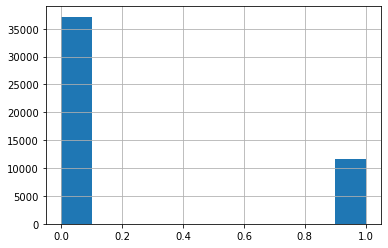

In [15]:
data['income'].hist()


<AxesSubplot:xlabel='education', ylabel='Count'>

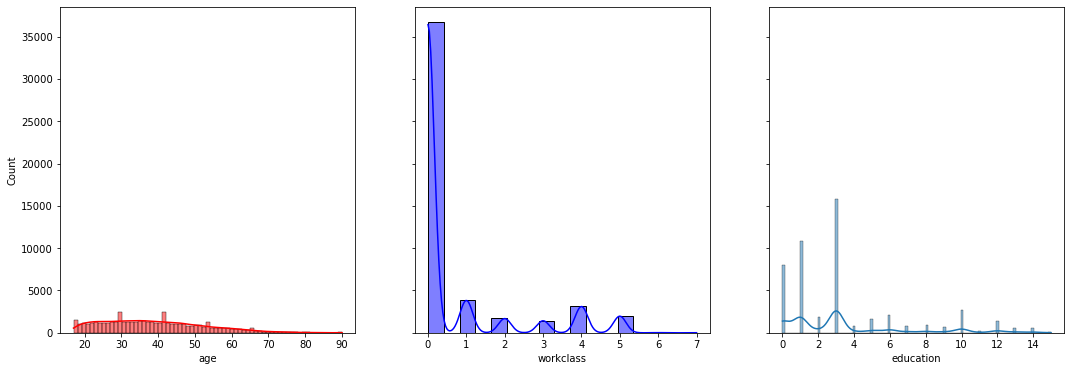

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="workclass", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="education", kde=True)

In [17]:
dataset_norm=dataset_new.drop(['income'],axis=1)
dataset_norm.iloc[:,1:15]=dataset_new.iloc[:,1:15].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
print(dataset_norm.shape)

(48842, 15)


In [18]:
dataset_norm.iloc[:10,:]

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,-0.995119,-0.487942,0.351671,-0.406392,-1.197247,0.772060,0.798147,-1.120455,2.922058,0.704213,-0.144802,-0.217125,-0.034087,-0.266148
1,1,-0.046941,-0.487942,-0.945514,-0.117763,-0.419331,-0.911639,1.488743,-0.310538,-0.378742,0.704213,-0.144802,-0.217125,0.772922,-0.266148
2,2,-0.776309,2.300003,1.394709,0.459495,0.747543,-0.911639,2.524637,-0.310538,-0.378742,0.704213,-0.144802,-0.217125,-0.034087,-0.266148
3,3,0.390679,-0.487942,-0.277841,-0.695021,-0.030373,-0.911639,0.798147,-0.310538,2.922058,0.704213,0.886865,-0.217125,-0.034087,-0.266148
4,4,-1.505676,-0.487942,-0.815946,-0.695021,-0.030373,0.772060,-0.237747,-1.120455,-0.378742,-1.419995,-0.144802,-0.217125,-0.841095,-0.266148
5,5,-0.338688,-0.487942,0.085497,2.479898,-1.586204,0.772060,-0.928343,0.499378,-0.378742,0.704213,-0.144802,-0.217125,-0.841095,-0.266148
6,6,-0.703372,-0.487942,0.353792,-0.117763,-0.419331,0.772060,-0.237747,2.119212,2.922058,0.704213,-0.144802,-0.217125,-0.034087,-0.266148
7,7,1.776478,0.209044,-0.805255,0.170866,1.914416,-0.911639,0.107551,-0.310538,-0.378742,0.704213,0.271595,-0.217125,-0.679693,-0.266148
8,8,-1.068055,-0.487942,1.704508,-0.695021,-0.030373,0.772060,-0.928343,2.119212,-0.378742,-1.419995,-0.144802,-0.217125,-0.034087,-0.266148
9,9,1.192984,-0.487942,-0.801751,1.325382,-2.364120,-0.911639,-1.273641,-0.310538,-0.378742,0.704213,-0.144802,-0.217125,-2.455112,-0.266148


In [19]:
col = "income"

df1=dataset_norm.drop(['Unnamed: 0'], axis=1)
df2 = data.loc[:,col]
X1 = np.asarray(df1)
Y1 = np.asarray(df2)
X1 = integerconverter1(X)
Y1 = integerconverter(Y)

In [20]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
#     from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

#     X, y = datasets.make_classification(
#         n_samples=1000, n_features=10, n_classes=2, random_state=123
#     )
    X_train, X_test, y_train, y_test = train_test_split(
        X1, Y1, test_size=0.33, random_state=123)

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.8103362700086859


In [21]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix

array([[11529,   734],
       [ 2323,  1532]], dtype=int64)

In [22]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1score = f1_score(y_test, predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.676081200353045
Recall = 0.3974059662775616
F1 Score = 0.5005718019931383


### Different Smoothing Techniques

### Laplace smoothing

In [23]:
import numpy as np
from collections import defaultdict

X_train = X_train.astype('int64', casting='unsafe')
y_train = y_train.astype('int64', casting='unsafe')
X_test = X_test.astype('int64', casting='unsafe')
y_test = y_test.astype('int64', casting='unsafe')


# Calculate the prior probability of each class (i.e., the proportion of instances in each class in the training set)
class_counts = np.bincount(y_train)
class_probs = class_counts / len(y_train)

# Create a dictionary to store the conditional probabilities of each feature given each class
probabilities = defaultdict(dict)

# Calculate the conditional probability of each feature given each class
alpha = 0.1 # Additive smoothing parameter
for label in np.unique(y_train):
    subset = X_train[y_train == label]
    for feature in range(X_train.shape[1]):
        feature_counts = np.bincount(subset[:, feature], minlength=X_train[:, feature].max() + 1)
        feature_probs = (feature_counts + alpha) / (len(subset) + alpha*(X_train[:, feature].max() + 1))
        for value, prob in enumerate(feature_probs):
            probabilities[label][str(feature) + '_' + str(value)] = prob

# Make predictions on the test set
predictions = []
for row in X_test:
    label_probabilities = {}
    for label in np.unique(y_train):
        label_probability = class_probs[label]
        for feature in range(len(row)):
            feature_value = row[feature]
            if str(feature) + '_' + str(feature_value) in probabilities[label]:
                prob = probabilities[label][str(feature) + '_' + str(feature_value)]
            else:
                prob = alpha / (len(X_train[y_train == label]) + alpha*(X_train[:, feature].max() + 1))
            label_probability *= prob
        label_probabilities[label] = label_probability
    predicted_label = max(label_probabilities, key=label_probabilities.get)
    predictions.append(predicted_label)

# Calculate the evaluation metrics of the predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label=1)
recall = recall_score(y_test, predictions, pos_label=1)
f1 = f1_score(y_test, predictions, pos_label=1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.8366422633081028
Precision: 0.62873999157185
Recall: 0.7740596627756161
F1-score: 0.693872805487734


### Lidstone Smoothing

In [24]:
import numpy as np

def train_naive_bayes_lidstone(X_train, y_train, alpha):
    num_instances, num_features = X_train.shape
    num_classes = len(np.unique(y_train))
    prior_prob = np.zeros(num_classes)
    likelihood = np.zeros((num_classes, num_features))
    
    for c in range(num_classes):
        X_c = X_train[y_train == c]
        prior_prob[c] = (len(X_c) + alpha) / (num_instances + alpha*num_classes)
        likelihood[c,:] = (np.sum(X_c, axis=0) + alpha) / (np.sum(X_c) + alpha*num_features)
    
    return prior_prob, likelihood

def predict_naive_bayes_lidstone(X_test, prior_prob, likelihood):
    num_instances = X_test.shape[0]
    num_classes = len(prior_prob)
    y_pred = np.zeros(num_instances)
    
    for i in range(num_instances):
        joint_prob = np.zeros(num_classes)
        for c in range(num_classes):
            joint_prob[c] = np.sum(np.log(likelihood[c,:])*X_test[i] + np.log(1-likelihood[c,:])*(1-X_test[i])) + np.log(prior_prob[c])
        y_pred[i] = np.argmax(joint_prob)
    
    return y_pred.astype(int)
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# assuming X_train, X_test, y_train, y_test are already defined
alpha = 1.0  # the smoothing parameter

# train the classifier
prior_prob, likelihood = train_naive_bayes_lidstone(X_train, y_train, alpha)

# make predictions on the test set
y_pred = predict_naive_bayes_lidstone(X_test, prior_prob, likelihood)

# evaluate the classifier performance
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.7853331678868346
Precision: 0.8790786948176583
Recall: 0.11880674448767833
F1-score: 0.20932358318098718


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [26]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [27]:
predictions = logisticRegr.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predictions)

0.7979770199242147

### K-Nearest Neighbors

In [29]:
#nsamples, nx, ny = X_train.shape #Converting to 2 dimensions
#X_train_2 = X_train.reshape((nsamples,nx*ny))

#nsamples, nx, ny = X_test.shape #Converting to 2 dimensions
#X_test_2 = X_test.reshape((nsamples,nx*ny))

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn.predict(X_train)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.8486431976530986

## Part B: Building a Basic Neural Network for Image Classification

In [33]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [34]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [35]:
X_train.shape

(60000, 28, 28)

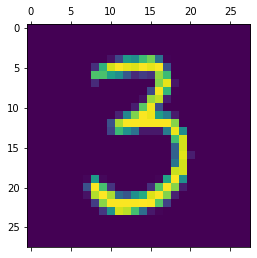

In [36]:
plt.matshow(X_train[50])


In [37]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [38]:
X_train_flattened.shape

(60000, 784)

In [39]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(50, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(50, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9287 - accuracy: 0.7351
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4739 - accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4234 - accuracy: 0.8693
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3856 - accuracy: 0.8818
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3793 - accuracy: 0.8835
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8908
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3428 - accuracy: 0.8934
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.9040
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.290

### Confusion Matrix

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 1s 1ms/step


### Accuracy

In [41]:
def acc(confusion):
    sum=0
    for i in range(10):
        sum=sum+cm[i,i]
    accuracy = sum/10000
    return accuracy

In [42]:
print(acc(cm))

tf.Tensor(0.9109, shape=(), dtype=float64)


### Visualising Confusion Matrix

Text(69.0, 0.5, 'Truth')

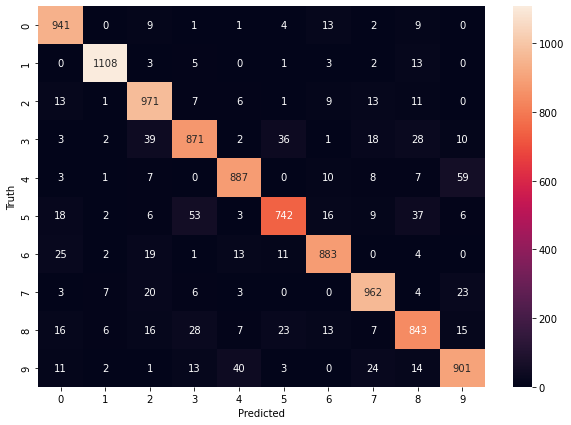

In [43]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Comparative Study of 15 models 

| Model No. | Hidden Layer(No.) | Neuron in 1st layer | Neuron in 2nd layer | Neuron in 3rd layer | Activation func. in 1st layer |  Activation func. in 2nd layer | Activation func. in 3rd layer |
| -:| -: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 | 2 | 50 | 50 | - | tanh | tanh | - |
| 2 | 2 | 50 | 50 | - | tanh | sigmoid | - |
| 3 | 2 | 50 | 50 | - | tanh | ReLu | - | :-: |
| 4 | 2 | 50 | 50 | - | sigmoid | sigmoid | - |
| 5 | 2 | 50 | 50 | - | sigmoid | ReLu | - |
| 6 | 2 | 50 | 50 | - | ReLu | ReLu | - |
| 7 | 3 | 50 | 50 | 50 | tanh | tanh | tanh |
| 8 | 3 | 50 | 50 | 50 | ReLu | tanh | tanh |
| 9 | 3 | 50 | 50 | 50 | ReLu | ReLu | tanh |
| 10 | 3 | 50 | 50 | 50 | sigmoid | tanh | tanh |
| 11 | 3 | 50 | 50 | 50 | sigmoid | sigmoid | tanh |
| 12 | 3 | 50 | 50 | 50 | sigmoid | sigmoid | sigmoid |
| 13 | 3 | 50 | 50 | 50 | ReLu | sigmoid | sigmoid |
| 14 | 3 | 50 | 50 | 50 | ReLu | ReLu | sigmoid |
| 15 | 3 | 50 | 50 | 50 | ReLu | ReLu | ReLu |


| Model No. | Iteration 1 | Iteration 2 | Iteration 3 | Iteration 4 | Iteration 5 | Iteration 6 | Iteration 7 | Iteration 8 | Iteration 9 | Iteration 10 | Final Accuracy
| :-:| -: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1 |  90.44 | 89.54 | 89.49 | 90.28 | 90.10 | 89.63 | 90.61 | 89.37 | 89.90 | 90.43 | 89.979 |
| 2 |  90.25 | 90.27 | 90.38 | 90.13 | 90.17 | 90.11 | 90.84 | 89.78 | 91.08 | 90.22 | 90.323 |
| 3 |  89.54 | 89.33 | 90.50 | 90.64 | 90.93 | 90.11 | 89.58 | 91.83 | 89.79 | 89.48 | 90.173 |
| 4 |  91.20 | 91.60 | 91.24 | 90.18 | 91.38 | 90.53 | 90.53 | 90.78 | 91.83 | 91.01 | 91.028 |
| 5 |  92.07 | 91.98 | 91.23 | 91.34 | 92.34 | 91.14 | 91.24 | 91.25 | 92.12 | 91.88 | 91.659 |
| 6 |  74.95 | 83.33 | 89.42 | 62.78 | 74.71 | 91.24 | 85.64 | 74.85 | 73.41 | 74.81 | 81.514 |
| 7 |  90.01 | 88.82 | 90.69 | 87.50 | 89.25 | 90.37 | 89.05 | 89.87 | 90.83 | 89.50 | 89.589 |
| 8 |  89.68 | 89.45 | 90.15 | 89.58 | 88.49 | 90.89 | 89.17 | 89.69 | 89.47 | 89.10 | 89.567 |
| 9 |  91.56 | 91.88 | 89.51 | 89.90 | 91.17 | 89.75 | 89.32 | 91.30 | 89.34 | 90.99 | 90.472 |
| 10|  90.78 | 92.22 | 91.49 | 91.60 | 90.72 | 88.53 | 91.60 | 91.46 | 92.01 | 91.86 | 91.230 |
| 11|  91.00 | 90.98 | 90.58 | 91.70 | 91.37 | 91.50 | 92.09 | 91.52 | 91.74 | 91.28 | 91.376 |
| 12|  90.03 | 90.77 | 92.16 | 90.67 | 90.31 | 91.34 | 90.69 | 91.26 | 90.85 | 90.74 | 90.982 |
| 13|  81.30 | 93.76 | 93.64 | 92.98 | 93.34 | 90.07 | 93.83 | 91.94 | 93.79 | 93.47 | 91.812 |
| 14|  91.01 | 94.21 | 94.72 | 93.95 | 94.74 | 93.40 | 94.27 | 94.34 | 93.36 | 94.49 | 93.649 |
| 15|  89.50 | 86.88 | 95.53 | 92.81 | 77.36 | 94.76 | 91.68 | 91.45 | 81.76 | 95.82 | 89.755 |